# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [16]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

from sklearn import set_config
set_config(transform_output='pandas')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [17]:
df = pd.read_csv('data/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])

In [18]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [21]:
TARGET = 'sales'
X, y = df.drop(columns=TARGET).values, df[TARGET].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [22]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [23]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = # вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [24]:
num_iters = 1000 # количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n, 1)) # вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # вычисляю прогноз без k-ого фактора
        h = (X[:, :k] @ w[: k]) + (X[:, k+1:] @ w[k+1:])
        
        # обновляю новое значение k-ого коэффициента
        w[k] = (X[:, k].T @ (y - h))
        
        # вычисляю функцию потерь
        cost = np.sum((X @ w - y) ** 2) / m

In [25]:
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [26]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

Значения коэффициентов w практически полностью совпадают.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [27]:
X, y = df.drop(columns=TARGET).values, df[TARGET].values

# мастшабирую матрицу признаков
# стандартизация по результатам которой среднее = 0 и стандартное отклонение = 1
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [28]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [29]:
def mse_error(y_true, y_pred):   
    return np.mean((y_true - y_pred)**2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [30]:
# наивный прогноз в виде среднего значения
y_pred = np.mean(y)

print(f'Значение метрики MSE для наивного прогноза: {mse_error(y, y_pred):.2f}')

Значение метрики MSE для наивного прогноза: 27.09


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [31]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [32]:
def stoch_grad_step(X, y, w, train_ind, eta):
    # вычисляю градиент на данном примере
    gradient = (2 * X[train_ind] * (X[train_ind] @ w - y[train_ind])) / len(y)
    
    # обновляю значения коэффициентов
    w -= eta * gradient
    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [33]:
def stochastic_gradient_descent(X, y, w, eta, iterations, stop_threshold):
    dist = np.inf # первоначально инициирую расстояние бесконечностью
    costs = [] # список для хранения значения ошибки MSE на каждой итерации
    
    for i in range(iterations):
        # если расстояние стало ниже поргового, то прекращаю цикл
        if dist < stop_threshold:
            break
        
        # сохраняю текущий вектор коэффициентов
        curr_w = w.copy()
        
        # генерирую случайный индекс для стахостического градиентного спуска
        rnd_train_ind = np.random.randint(len(X))
        
        # обновляю вектор коэффициентов на основе алгоритма стахостического градиентного спуска
        w = stoch_grad_step(X, y, w, rnd_train_ind, eta)
        
        # определяю расстояние между векторами
        dist = np.linalg.norm(curr_w - w)
        
        # делаю предсказание
        y_pred = lin_pred(X, w)
        
        # рассчитываю ошибку и сохраняю значение в список
        cur_mse = mse_error(y, y_pred)
        costs.append(cur_mse)
    
    print(f'Остановка на {i} итерации. Значение MSE: {cur_mse:.2f}')    
    return w, costs

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [37]:
w = np.zeros(X.shape[1])
w, costs = stochastic_gradient_descent(X, y, w, 0.5, 10**5, 0.00001)

Остановка на 833 итерации. Значение MSE: 2.82


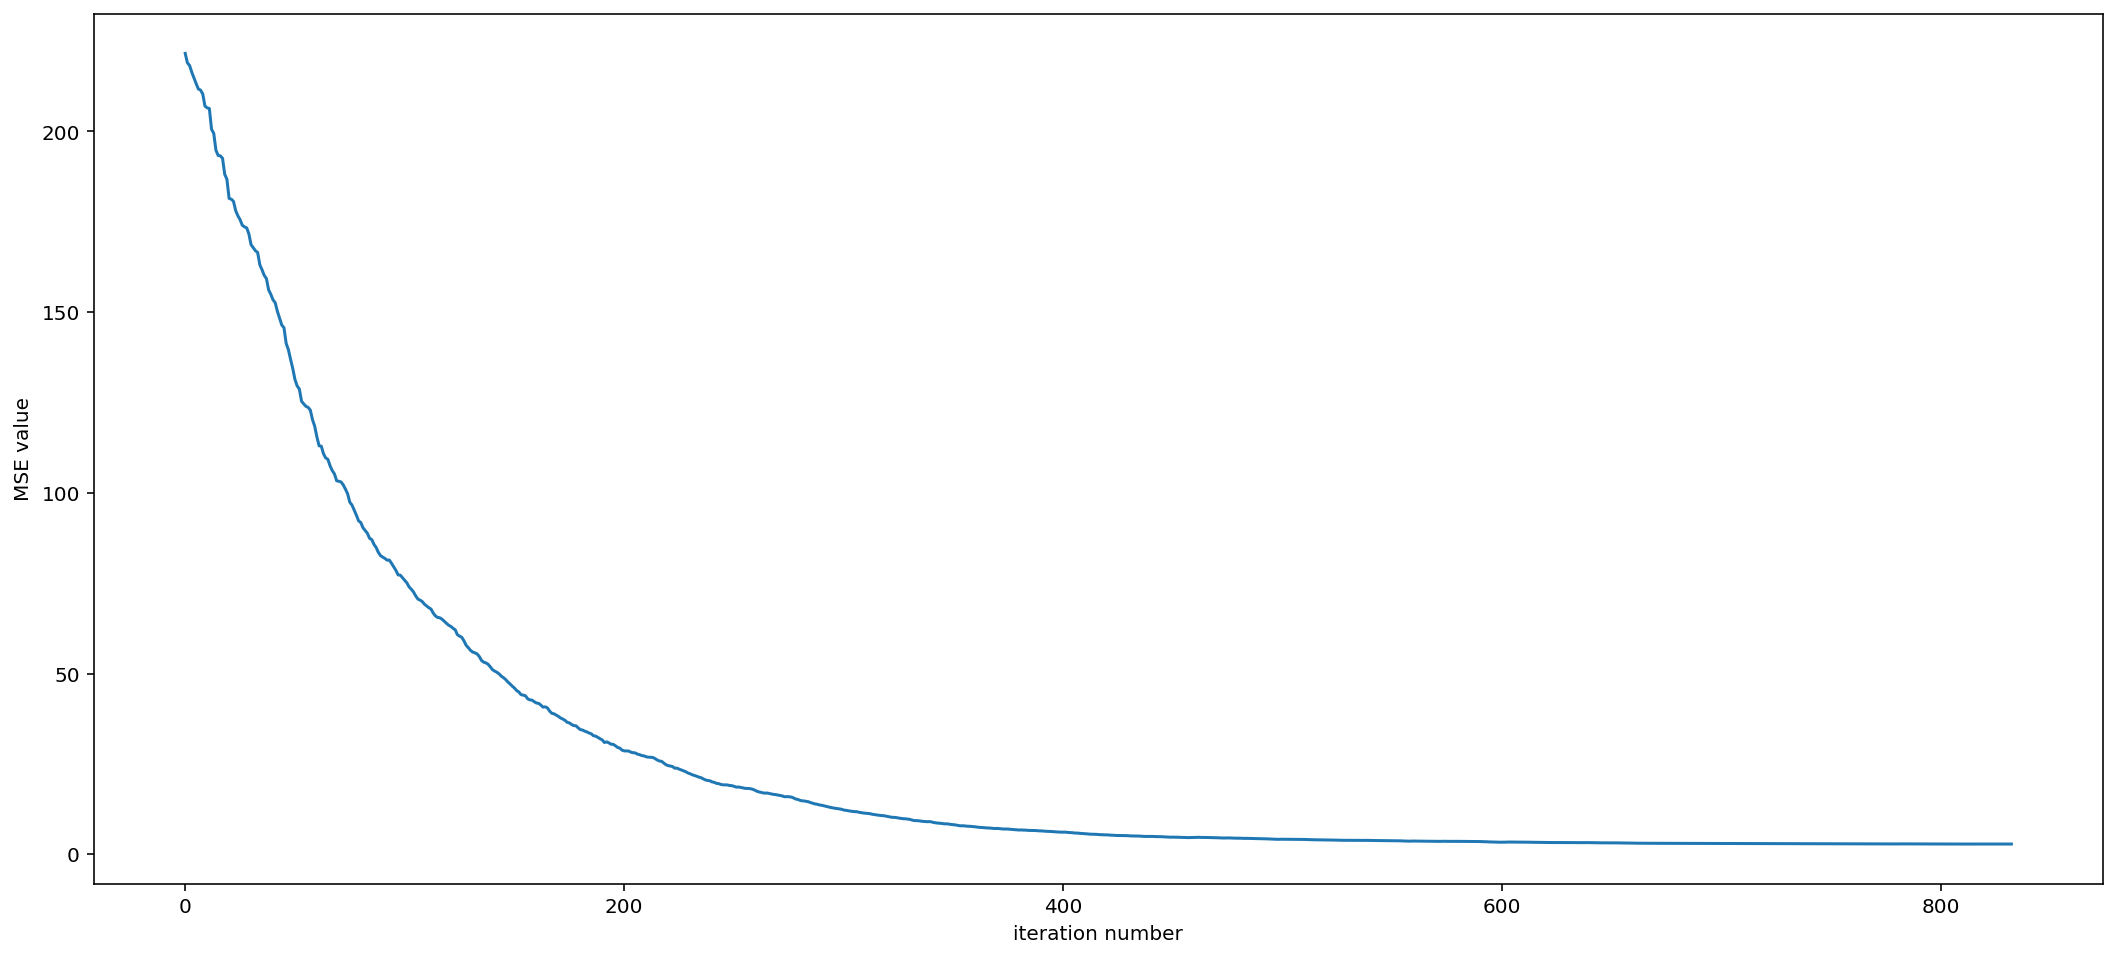

In [38]:
fig, ax = plt.subplots(figsize=(18, 8)) # фигура + координатная плоскость
ax.plot(costs) # линейный график для тренировочной выборки
ax.set_xlabel('iteration number') # название оси абсцисс
ax.set_ylabel('MSE value'); # название оси ординат

**Выведите вектор весов, к которому сошелся метод.**

In [39]:
w

array([13.92902356,  3.91550223,  2.96939782, -0.06115628])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [40]:
costs[-1]

2.8209107826536752